In [1]:
#import libraries
import pandas as pd
#libarry for feature scaling
from sklearn.preprocessing import StandardScaler
# #confusion matix
from sklearn import metrics
# to creating and reading pickle file
import pickle 
import os, sys
import csv
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
# from util import Util_class as obj_util
import importlib.util

In [2]:
# importing template file 
spec = importlib.util.spec_from_file_location("Util_class", "/home/admin1/PycharmProjects/Machine-Learning/Week10/Util/util.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
# creating object of Template class
obj_util = foo.Util_class()

In [3]:
# load dataset
test_dataset = pd.read_csv ("CSV_files/test_file.csv")
print("Dataset has {} rows and {} Columns".format(test_dataset.shape[0],test_dataset.shape[1])) 

Dataset has 1146 rows and 9 Columns


In [4]:
x_test = test_dataset.loc[:,test_dataset.columns != 'Result'].values
y_test = test_dataset.loc[:,test_dataset.columns == 'Result'].values
#convert numpy array to dataframe
df_x =  pd.DataFrame(x_test)

print("x_test :",x_test.shape,"& y_test:",y_test.shape)

x_test : (1146, 8) & y_test: (1146, 1)


In [5]:
# Handle categorical data for test dataset
x_test_dataset = obj_util.Categorical_data(df_x)

In [6]:
#feature scalling (here data will be converted into float)
def feature_scalling(x_test,y_test):
    sc_x = StandardScaler()
    x_test = sc_x.fit_transform(x_test)
    return sc_x, x_test
    
sc_x, x_test = feature_scalling(x_test_dataset,y_test)

In [7]:
file1 = open('KNN2.pkl', 'rb')
classifier = pickle.load(file1)

In [8]:
def final_tetsing():
    # predict y for test data
    y_pre = obj_util.y_prediction(x_test, classifier)

    # calculate accuracy
    accuracy_score,average_precision,auc=obj_util.accuracy(y_pre,y_test)
    print('\n\nAverage accuracy_score:' , accuracy_score)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('Average Roc-AUC: %.3f' % auc)
    
    # show confusion matrix
    print("\n\nConfusion Matrix:\n",metrics.confusion_matrix(y_test, y_pre))
    
#     obj_util.visualization(x_test,y_test, classifier, "Logistic Regression(Training set)", "Age", "Estimate Salary")
    
    
final_tetsing()



Average accuracy_score: 89.26701570680629
Average precision-recall score: 27.74
Average Roc-AUC: 65.203


Confusion Matrix:
 [[977  32]
 [ 91  46]]


In [9]:
import matplotlib.pyplot as plt
import seaborn as sb

In [10]:
x = test_dataset.iloc[:,3]
x1 = test_dataset.iloc[:,4]
y = test_dataset.iloc[:,0]

In [11]:
x.shape,y.shape,x1.shape

((1146,), (1146,), (1146,))

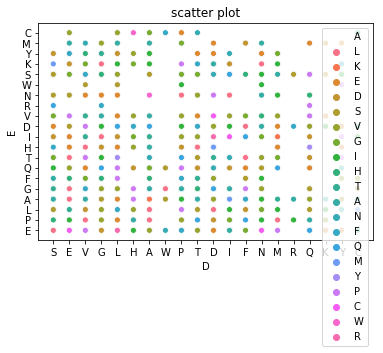

In [12]:
sb.scatterplot(x = x,y = x1,hue = y, data=test_dataset)
plt.title('scatter plot')
plt.legend()
plt.show()